# Part I - (Ford GoBike System Data - Exploration)
## by Aristide FOTSO

## Introduction
> **DATASET**: Ford GoBike System Data
> * This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in dataset


In [2]:
df = pd.read_csv('./201902-fordgobike-tripdata.csv')
df.sample(5)

duration_sec                start_time                  end_time  \
174971           672  2019-02-02 15:58:11.1780  2019-02-02 16:09:24.0850   
50514            187  2019-02-21 19:07:41.0130  2019-02-21 19:10:48.9450   
99994           1117  2019-02-14 18:39:18.9930  2019-02-14 18:57:56.6470   
68946            531  2019-02-19 20:37:58.4630  2019-02-19 20:46:49.7430   
125057          1140  2019-02-11 07:47:55.1870  2019-02-11 08:06:56.1740   

        start_station_id                                 start_station_name  \
174971             116.0                          Mississippi St at 17th St   
50514               67.0  San Francisco Caltrain Station 2  (Townsend St...   
99994              155.0                           Emeryville Public Market   
68946              223.0                     16th St Mission BART Station 2   
125057             119.0                                  18th St at Noe St   

        start_station_latitude  start_station_longitude  end_station_id  \
174971               37.764802              -122.394771            61.0   
50514                37.776639              -122.395526            90.0   
99994                37.840521              -122.293528           183.0   
68946                37.764765              -122.420091            73.0   
125057               37.761047              -122.432642            66.0   

                end_station_name  end_station_latitude  end_station_longitude  \
174971       Howard St at 8th St             37.776513            -122.411306   
50514      Townsend St at 7th St             37.771058            -122.402717   
99994   Telegraph Ave at 19th St             37.808702            -122.269927   
68946     Pierce St at Haight St             37.771793            -122.433708   
125057     3rd St at Townsend St             37.778742            -122.392741   

        bike_id   user_type  member_birth_year member_gender  \
174971     4653  Subscriber             1995.0          Male   
50514      6133  Subscriber             1987.0          Male   
99994      4694  Subscriber             1988.0          Male   
68946      5828  Subscriber             1990.0        Female   
125057     1428  Subscriber             1985.0          Male   

       bike_share_for_all_trip  
174971                      No  
50514                       No  
99994                       No  
68946                       No  
125057                      No

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
#Print distinct values of some properties
print(df['user_type'].value_counts())
print(df['bike_share_for_all_trip'].value_counts())
print(df['member_gender'].value_counts())

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64
No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64
Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64


In [5]:
# convert user_type, bike_share_for_all_trip, and member_gender into ordered categorical types
def convertCategorical(df):
    ordinal_var_dict = {'user_type': ['Customer','Subscriber'],
                    'bike_share_for_all_trip': ['No', 'Yes'],
                    'member_gender': ['Other', 'Female', 'Male'],
                   'AgeGroup': ['very_young','young','midlife','old','very_old']}

    for var in ordinal_var_dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
        df[var] = df[var].astype(ordered_var, errors='ignore')

In [6]:
#convertCategorical(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
df[df['member_birth_year'].isnull()]

duration_sec                start_time                  end_time  \
1              42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
13               915  2019-02-28 23:49:06.0620  2019-03-01 00:04:21.8670   
28               650  2019-02-28 23:43:27.5030  2019-02-28 23:54:18.4510   
53              3418  2019-02-28 22:41:16.3620  2019-02-28 23:38:14.3630   
65               926  2019-02-28 23:17:05.8530  2019-02-28 23:32:32.6820   
...              ...                       ...                       ...   
183354           449  2019-02-01 01:35:07.6630  2019-02-01 01:42:36.8780   
183356           795  2019-02-01 01:25:50.3660  2019-02-01 01:39:05.9500   
183363           673  2019-02-01 01:12:24.4200  2019-02-01 01:23:37.6450   
183371           196  2019-02-01 01:08:38.6410  2019-02-01 01:11:54.9490   
183402           122  2019-02-01 00:17:32.2580  2019-02-01 00:19:34.9380   

        start_station_id              start_station_name  \
1                   23.0   The Embarcadero at Steuart St   
13                 252.0    Channing Way at Shattuck Ave   
28                 258.0     University Ave at Oxford St   
53                  11.0          Davis St at Jackson St   
65                  13.0  Commercial St at Montgomery St   
...                  ...                             ...   
183354             244.0      Shattuck Ave at Hearst Ave   
183356             368.0            Myrtle St at Polk St   
183363              75.0        Market St at Franklin St   
183371              58.0            Market St at 10th St   
183402             119.0               18th St at Noe St   

        start_station_latitude  start_station_longitude  end_station_id  \
1                    37.791464              -122.391034            81.0   
13                   37.865847              -122.267443           244.0   
28                   37.872355              -122.266447           263.0   
53                   37.797280              -122.398436            11.0   
65                   37.794231              -122.402923            81.0   
...                        ...                      ...             ...   
183354               37.873676              -122.268487           253.0   
183356               37.785434              -122.419622           125.0   
183363               37.773793              -122.421239           133.0   
183371               37.776619              -122.417385            75.0   
183402               37.761047              -122.432642           120.0   

                     end_station_name  end_station_latitude  \
1                  Berry St at 4th St             37.775880   
13         Shattuck Ave at Hearst Ave             37.873676   
28      Channing Way at San Pablo Ave             37.862827   
53             Davis St at Jackson St             37.797280   
65                 Berry St at 4th St             37.775880   
...                               ...                   ...   
183354        Haste St at College Ave             37.866418   
183356           20th St at Bryant St             37.759200   
183363         Valencia St at 22nd St             37.755213   
183371       Market St at Franklin St             37.773793   
183402           Mission Dolores Park             37.761420   

        end_station_longitude  bike_id   user_type  member_birth_year  \
1                 -122.393170     2535    Customer                NaN   
13                -122.268487     5101  Subscriber                NaN   
28                -122.290231     4784    Customer                NaN   
53                -122.398436      319    Customer                NaN   
65                -122.393170     2951  Subscriber                NaN   
...                       ...      ...         ...                ...   
183354            -122.253799     5430    Customer                NaN   
183356            -122.409851     5400  Subscriber                NaN   
183363            -122.420975     5166    Customer         

In [8]:
# Extract rows where 'member_birth_year' and 'member_gender' columns are not null
df_notNaN = df[~(df['member_birth_year'].isnull())]
df_notNaN[df_notNaN['member_birth_year'].isnull()]

Empty DataFrame
Columns: [duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip]
Index: []

In [9]:
nb_rows = df_notNaN.shape[0]
trip_id = np.arange(0, nb_rows, 1)
df_notNaN.insert(0, "trip_id", trip_id)
df_notNaN.head(5)

trip_id  duration_sec                start_time                  end_time  \
0        0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
2        1         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3        2         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4        3          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5        4          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes  
5          Male                      No

In [10]:
import warnings
warnings.filterwarnings('ignore')
# Convert 'start_time', 'end_time' columns into datetime
df_notNaN['start_time']= pd.to_datetime(df['start_time'])
df_notNaN['end_time']= pd.to_datetime(df['end_time'])
# Convert 'member_birth_year', 'start_station_id', 'end_station_id' columns into integer
df_notNaN['member_birth_year'] = df_notNaN['member_birth_year'].apply(int)
print(df_notNaN.dtypes)

trip_id                             int64
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


In [11]:
# Delete 'start_station_id', 'end_station_id' columns because they are not necessary
df_notNaN = df_notNaN.drop(['start_station_id', 'end_station_id', 'duration_sec'], axis=1)
df_notNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_id                  175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   175147 non-null  float64       
 5   start_station_longitude  175147 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     175147 non-null  float64       
 8   end_station_longitude    175147 non-null  float64       
 9   bike_id                  175147 non-null  int64         
 10  user_type                175147 non-null  object        
 11  member_birth_year        175147 non-null  int64         
 12  member_gender   

In [12]:
df_notNaN.sample(10)

trip_id              start_time                end_time  \
1625       1561 2019-02-28 18:50:23.425 2019-02-28 19:00:59.986   
172528   164867 2019-02-03 15:43:33.838 2019-02-03 15:47:35.348   
177494   169522 2019-02-01 21:15:20.081 2019-02-01 21:21:51.360   
119733   114451 2019-02-11 17:36:25.947 2019-02-11 17:45:31.204   
9884       9510 2019-02-27 23:07:21.087 2019-02-27 23:24:15.897   
89036     85022 2019-02-16 16:38:35.007 2019-02-16 16:43:41.597   
93473     89214 2019-02-15 17:37:35.585 2019-02-15 17:46:00.336   
25383     24464 2019-02-25 17:07:31.577 2019-02-25 17:12:35.553   
3978       3819 2019-02-28 16:26:14.397 2019-02-28 16:47:28.262   
5224       5011 2019-02-28 13:44:56.387 2019-02-28 13:48:30.547   

                                       start_station_name  \
1625                                   Berry St at 4th St   
172528                             Downtown Berkeley BART   
177494                          San Fernando St at 4th St   
119733                               Webster St at 2nd St   
9884                  Union Square (Powell St at Post St)   
89036                         Woolsey St at Sacramento St   
93473                            19th Street BART Station   
25383                            Telegraph Ave at 27th St   
3978                           Raymond Kimbell Playground   
5224    San Francisco Ferry Building (Harry Bridges Pl...   

        start_station_latitude  start_station_longitude  \
1625                 37.775880              -122.393170   
172528               37.870139              -122.268422   
177494               37.335885              -121.885660   
119733               37.795195              -122.273970   
9884                 37.788300              -122.408531   
89036                37.850578              -122.278175   
93473                37.809013              -122.268247   
25383                37.816073              -122.267886   
3978                 37.783813              -122.434559   
5224                 37.795392              -122.394203   

                                    end_station_name  end_station_latitude  \
1625    Powell St BART Station (Market St at 4th St)             37.786375   
172528                  MLK Jr Way at University Ave             37.871719   
177494                         5th St at Virginia St             37.325998   
119733                          2nd Ave at E 18th St             37.800214   
9884                            Market St at 10th St             37.776619   
89036                             Ashby BART Station             37.852477   
93473                   Grand Ave at Santa Clara Ave             37.812744   
25383                       19th Street BART Station             37.809013   
3978                       24th St at Chattanooga St             37.751819   
5224                   The Embarcadero at Steuart St             37.791464   

        end_station_longitude  bike_id   user_type  member_birth_year  \
1625              -122.404904     6446  Subscriber               1995   
172528            -122.273068     5429  Subscriber               1996   
177494            -121.877120     3989  Subscriber               1994   
119733            -122.253810     4505  Subscriber               1986   
9884              -122.417385     5400  Subscriber               1994   
89036             -122.270213     6360  Subscriber               1967   
93473             -122.247215     6350  Subscriber               1968   
25383             -122.268247      695  Subscriber               1970   
3978              -122.426614     5341  Subscriber               1970   
5224              -122.391034     5382  Subscriber               1972   

       member_gender bike_share_for_all_trip  
1625            Male                      No  
172528          Male                      No  
177494          Male                     Yes  
119733          Male                      No  
9884            Male                      No  
890

#### Tidiness
- Five variables in eight columns in `df_notNaN` table (step, time, station_name, station_latitude, station_longitude)

#### Tidiness cleaning
- Melt the `start_time, end_time, 'start_station_name', 'end_station_name', 'start_station_latitude', 'end_station_latitude', 'start_station_longitude', 'end_station_longitude'` columns to `step, time, station_name, station_latitude, station_longitude` columns

In [13]:
melt_columns = ['start_time', 'end_time', 'start_station_name', 'end_station_name', 'start_station_latitude', 'end_station_latitude', 'start_station_longitude', 'end_station_longitude']
other_columns = ['step', 'trip_id', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip']
df_notNaN_melt = pd.DataFrame()
def melt_df(melt_columns, other_columns):
    i = 0
    j = 0
    value_list = ['time', 'station_name', 'station_latitude', 'station_longitude']
    while(i < len(melt_columns)):
        df_notNaN_columns = list(df_notNaN.drop([melt_columns[i], melt_columns[i+1]], axis=1))
        df_notNaN_melt2 = pd.melt(df_notNaN, id_vars=df_notNaN_columns, var_name='step', value_name=value_list[j])
        df_notNaN_melt2 = df_notNaN_melt2.sort_values(['member_birth_year'])
        df_notNaN_melt[value_list[j]] = df_notNaN_melt2[value_list[j]]
        i = i + 2
        j = j+1
    for i in range(len(other_columns)):
        df_notNaN_melt[other_columns[i]] = df_notNaN_melt2[other_columns[i]]
    df_notNaN_melt['step'] = df_notNaN_melt['step'].str.replace(r'(_.*)', '', regex=True)
    column_to_move = df_notNaN_melt.pop("step")
    df_notNaN_melt.insert(0, "step", column_to_move)
    column_to_move = df_notNaN_melt.pop("trip_id")
    df_notNaN_melt.insert(0, "trip_id", column_to_move)
    #df_notNaN_melt['trip_id'] = df_notNaN_melt['trip_id'].astype(int)
    df_notNaN_melt['bike_id'] = df_notNaN_melt['bike_id'].astype(str)
    return df_notNaN_melt.sort_values(['trip_id'])
df_notNaN_melt = melt_df(melt_columns, other_columns)
df_notNaN_melt['trip_id'] = df_notNaN_melt['trip_id'].astype(str)
df_notNaN_melt.head(10)

trip_id   step                    time  \
0            0  start 2019-02-28 17:32:10.145   
175147       0    end 2019-03-01 08:01:55.975   
175148       1    end 2019-03-01 05:24:08.146   
1            1  start 2019-02-28 12:13:13.218   
175149       2    end 2019-03-01 04:02:36.842   
2            2  start 2019-02-28 17:54:26.010   
175150       3    end 2019-03-01 00:20:44.074   
3            3  start 2019-02-28 23:54:18.549   
175151       4    end 2019-03-01 00:19:51.760   
4            4  start 2019-02-28 23:49:58.632   

                                            station_name  station_latitude  \
0       Montgomery St BART Station (Market St at 2nd St)         37.789625   
175147                    Commercial St at Montgomery St         37.794231   
175148      Powell St BART Station (Market St at 4th St)         37.786375   
1                                Market St at Dolores St         37.769305   
175149                            Central Ave at Fell St         37.773311   
2                                Grove St at Masonic Ave         37.774836   
175150                             10th Ave at E 15th St         37.792714   
3                                    Frank H Ogawa Plaza         37.804562   
175151                                Broadway at Kearny         37.798014   
4                           4th St at Mission Bay Blvd S         37.770407   

        station_longitude bike_id   user_type  member_birth_year  \
0             -122.400811    4902    Customer               1984   
175147        -122.402923    4902    Customer               1984   
175148        -122.404904    5905    Customer               1972   
1             -122.426826    5905    Customer               1972   
175149        -122.444293    6638  Subscriber               1989   
2             -122.446546    6638  Subscriber               1989   
175150        -122.248780    4898  Subscriber               1974   
3             -122.271738    4898  Subscriber               1974   
175151        -122.405950    5200  Subscriber               1959   
4             -122.391198    5200  Subscriber               1959   

       member_gender bike_share_for_all_trip  
0               Male                      No  
175147          Male                      No  
175148          Male                      No  
1               Male                      No  
175149         Other                      No  
2              Other                      No  
175150          Male                     Yes  
3               Male                     Yes  
175151          Male                      No  
4               Male                      No

In [14]:
df_notNaN_melt.describe()

station_latitude  station_longitude  member_birth_year
count     350294.000000      350294.000000      350294.000000
mean          37.770911        -122.351093        1984.806437
std            0.101024           0.118235          10.116674
min           37.317298        -122.453704        1878.000000
25%           37.770407        -122.411738        1980.000000
50%           37.780955        -122.397437        1987.000000
75%           37.797320        -122.283093        1992.000000
max           37.880222        -121.874119        2001.000000

In [15]:
#create a new column, AgeGroup to classify the member_birth_year
bins= [1878,1922,1972,1986,2001,2022]
labels = ['very_young','young','midlife','old','very_old']
df_notNaN_melt['AgeGroup'] = pd.cut(df_notNaN_melt['member_birth_year'], bins=bins, labels=labels, right=False)
df_notNaN_melt.head()

trip_id   step                    time  \
0            0  start 2019-02-28 17:32:10.145   
175147       0    end 2019-03-01 08:01:55.975   
175148       1    end 2019-03-01 05:24:08.146   
1            1  start 2019-02-28 12:13:13.218   
175149       2    end 2019-03-01 04:02:36.842   

                                            station_name  station_latitude  \
0       Montgomery St BART Station (Market St at 2nd St)         37.789625   
175147                    Commercial St at Montgomery St         37.794231   
175148      Powell St BART Station (Market St at 4th St)         37.786375   
1                                Market St at Dolores St         37.769305   
175149                            Central Ave at Fell St         37.773311   

        station_longitude bike_id   user_type  member_birth_year  \
0             -122.400811    4902    Customer               1984   
175147        -122.402923    4902    Customer               1984   
175148        -122.404904    5905    Customer               1972   
1             -122.426826    5905    Customer               1972   
175149        -122.444293    6638  Subscriber               1989   

       member_gender bike_share_for_all_trip AgeGroup  
0               Male                      No  midlife  
175147          Male                      No  midlife  
175148          Male                      No  midlife  
1               Male                      No  midlife  
175149         Other                      No      old

In [16]:
df_notNaN_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350294 entries, 0 to 175146
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_id                  350294 non-null  object        
 1   step                     350294 non-null  object        
 2   time                     350294 non-null  datetime64[ns]
 3   station_name             349904 non-null  object        
 4   station_latitude         350294 non-null  float64       
 5   station_longitude        350294 non-null  float64       
 6   bike_id                  350294 non-null  object        
 7   user_type                350294 non-null  object        
 8   member_birth_year        350294 non-null  int64         
 9   member_gender            350294 non-null  object        
 10  bike_share_for_all_trip  350294 non-null  object        
 11  AgeGroup                 350294 non-null  category      
dtypes: category(1), 

##### Statistical description of trip

In [17]:
# Calculate duration between start_time and end_time
grouped_trip_id_duration = df_notNaN_melt.groupby('trip_id').apply(lambda x: (x.loc[x['step'] == 'end', 'time'].item() - x.loc[x['step'] == 'start', 'time'].item()))

In [18]:
grouped_trip_id_duration

trip_id
0       0 days 14:29:45.830000
1       0 days 17:10:54.928000
10      0 days 00:08:26.193000
100     0 days 00:04:19.032000
1000    0 days 00:06:26.978000
                 ...          
99995   0 days 00:08:48.934000
99996   0 days 00:10:33.277000
99997   0 days 00:02:20.583000
99998   0 days 00:05:47.498000
99999   0 days 00:11:08.976000
Length: 175147, dtype: timedelta64[ns]

In [19]:
# Import the geodesic module from geopy library 
from geopy.distance import geodesic as GD
# Calculate distance between station_start and station_end
grouped_trip_id_distance = df_notNaN_melt.groupby('trip_id').apply(lambda x: (GD((x.loc[x['step'] == 'end', 'station_latitude'].item(), 
                                                                                  x.loc[x['step'] == 'end', 'station_longitude'].item()),
                                                                                 (x.loc[x['step'] == 'start', 'station_latitude'].item(), 
                                                                                  x.loc[x['step'] == 'start', 'station_longitude'].item())).km))

In [20]:
grouped_trip_id_distance.head()

trip_id
0       0.543983
1       2.705390
10      1.617146
100     0.512555
1000    0.899397
dtype: float64

In [21]:
grouped_trip_id_duration.index.values.tolist()

['0',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100001',
 '100002',
 '100003',
 '100004',
 '100005',
 '100006',
 '100007',
 '100008',
 '100009',
 '10001',
 '100010',
 '100011',
 '100012',
 '100013',
 '100014',
 '100015',
 '100016',
 '100017',
 '100018',
 '100019',
 '10002',
 '100020',
 '100021',
 '100022',
 '100023',
 '100024',
 '100025',
 '100026',
 '100027',
 '100028',
 '100029',
 '10003',
 '100030',
 '100031',
 '100032',
 '100033',
 '100034',
 '100035',
 '100036',
 '100037',
 '100038',
 '100039',
 '10004',
 '100040',
 '100041',
 '100042',
 '100043',
 '100044',
 '100045',
 '100046',
 '100047',
 '100048',
 '100049',
 '10005',
 '100050',
 '100051',
 '100052',
 '100053',
 '100054',
 '100055',
 '100056',
 '100057',
 '100058',
 '100059',
 '10006',
 '100060',
 '100061',
 '100062',
 '100063',
 '100064',
 '100065',
 '100066',
 '100067',
 '100068',
 '100069',
 '10007',
 '100070',
 '100071',
 '100072',
 '100073',
 '100074',
 '100075',
 '100076',
 '100077',
 '100078',
 '100079',
 '10

New dataframe for future exploration and explanation process

In [22]:
# Extract user_type property
grouped_trip_id_user_type = df_notNaN_melt.groupby('trip_id').apply(lambda x: (x.loc[x['step'] == 'end', 'user_type'].item()))
grouped_trip_id_user_type.head()

trip_id
0         Customer
1         Customer
10      Subscriber
100     Subscriber
1000    Subscriber
dtype: object

In [23]:
# Extract bike_share_for_all_trip property
grouped_trip_id_bike_share_for_all_trip = df_notNaN_melt.groupby('trip_id').apply(lambda x: (x.loc[x['step'] == 'end', 'bike_share_for_all_trip'].item()))
grouped_trip_id_bike_share_for_all_trip.head()

trip_id
0       No
1       No
10      No
100     No
1000    No
dtype: object

In [24]:
# Extract AgeGroup property
grouped_trip_id_AgeGroup = df_notNaN_melt.groupby('trip_id').apply(lambda x: (x.loc[x['step'] == 'end', 'AgeGroup'].item()))
grouped_trip_id_AgeGroup.head()

trip_id
0       midlife
1       midlife
10          old
100         old
1000    midlife
dtype: object

In [25]:
# Extract member_gender property
grouped_trip_id_member_gender = df_notNaN_melt.groupby('trip_id').apply(lambda x: (x.loc[x['step'] == 'end', 'member_gender'].item()))
grouped_trip_id_member_gender.head()

trip_id
0       Male
1       Male
10      Male
100     Male
1000    Male
dtype: object

In [26]:
# Extract member_birth_year property
grouped_trip_id_member_birth_year = df_notNaN_melt.groupby('trip_id').apply(lambda x: (x.loc[x['step'] == 'end', 'member_birth_year'].item()))
grouped_trip_id_member_birth_year.head()

trip_id
0       1984
1       1972
10      1993
100     1998
1000    1977
dtype: int64

In [27]:
# Extract bike_id property
grouped_trip_id_bike_id = df_notNaN_melt.groupby('trip_id').apply(lambda x: (x.loc[x['step'] == 'end', 'bike_id'].item()))
grouped_trip_id_bike_id.head()

trip_id
0       4902
1       5905
10      5848
100     5894
1000    1814
dtype: object

In [28]:
#list_of_series = [grouped_trip_id_duration.index.values.tolist(), grouped_trip_id_duration.tolist(), grouped_trip_id_distance.tolist()]
cols = ['bike_id', 'trip_duration', 'trip_distance(km)', 
        'member_birth_year', 'member_gender', 'user_type', 'AgeGroup', 'bike_share_for_all_trip']
grouped_trip_id = pd.DataFrame(list(zip(grouped_trip_id_bike_id.tolist(), 
                                        grouped_trip_id_duration.tolist(), grouped_trip_id_distance.tolist()
                                       , grouped_trip_id_member_birth_year.tolist()
                                       , grouped_trip_id_member_gender.tolist()
                                       , grouped_trip_id_user_type.tolist()
                                       , grouped_trip_id_AgeGroup.tolist()
                                       , grouped_trip_id_bike_share_for_all_trip.tolist())),
               columns = cols)
grouped_trip_id.head()

bike_id          trip_duration  trip_distance(km)  member_birth_year  \
0    4902 0 days 14:29:45.830000           0.543983               1984   
1    5905 0 days 17:10:54.928000           2.705390               1972   
2    5848 0 days 00:08:26.193000           1.617146               1993   
3    5894 0 days 00:04:19.032000           0.512555               1998   
4    1814 0 days 00:06:26.978000           0.899397               1977   

  member_gender   user_type AgeGroup bike_share_for_all_trip  
0          Male    Customer  midlife                      No  
1          Male    Customer  midlife                      No  
2          Male  Subscriber      old                      No  
3          Male  Subscriber      old                      No  
4          Male  Subscriber  midlife                      No

In [29]:
grouped_trip_id.describe()

trip_duration  trip_distance(km)  member_birth_year
count                     175147      175147.000000      175147.000000
mean   0 days 00:11:44.710840728           1.689220        1984.806437
std    0 days 00:27:21.607874630           1.096509          10.116689
min       0 days 00:01:01.081000           0.000000        1878.000000
25%       0 days 00:05:23.450500           0.907248        1980.000000
50%       0 days 00:08:30.964000           1.428159        1987.000000
75%       0 days 00:13:09.485500           2.222435        1992.000000
max       0 days 23:29:08.051000          69.465977        2001.000000

> The average trip duration is **11 min 45 s**

In [30]:
convertCategorical(grouped_trip_id)

In [31]:
grouped_trip_id['trip_duration(s)'] = grouped_trip_id['trip_duration'].dt.total_seconds()
grouped_trip_id.drop(['trip_duration'], axis=1, inplace=True)

In [32]:
grouped_trip_id.drop(columns=['bike_id', 'trip_distance(km)'], inplace=True)
grouped_trip_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175147 entries, 0 to 175146
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   member_birth_year        175147 non-null  int64   
 1   member_gender            175147 non-null  category
 2   user_type                175147 non-null  category
 3   AgeGroup                 175147 non-null  category
 4   bike_share_for_all_trip  175147 non-null  category
 5   trip_duration(s)         175147 non-null  float64 
dtypes: category(4), float64(1), int64(1)
memory usage: 3.3 MB


> We create new dataframe which contain time, user_type, AgeGroup

In [33]:
time_trip_df = pd.DataFrame()
time_trip_df['step'] = df_notNaN_melt['step']
time_trip_df['time'] = df_notNaN_melt['time']
time_trip_df['user_type'] = df_notNaN_melt['user_type']
time_trip_df['AgeGroup'] = df_notNaN_melt['AgeGroup']
time_trip_df.head()

step                    time   user_type AgeGroup
0       start 2019-02-28 17:32:10.145    Customer  midlife
175147    end 2019-03-01 08:01:55.975    Customer  midlife
175148    end 2019-03-01 05:24:08.146    Customer  midlife
1       start 2019-02-28 12:13:13.218    Customer  midlife
175149    end 2019-03-01 04:02:36.842  Subscriber      old

Let's consider only times for step **'start'**, and split time column into two columns: date and time

In [34]:
time_trip_df = time_trip_df[time_trip_df['step'] == 'start']
time_trip_df.drop(columns=['step'], inplace=True)
time_trip_df['time'] = time_trip_df['time'].astype(str)
time_trip_df[['date','time']] = time_trip_df.time.str.split(expand=True)

In [35]:
time_trip_df.head()

time   user_type AgeGroup        date
0  17:32:10.145    Customer  midlife  2019-02-28
1  12:13:13.218    Customer  midlife  2019-02-28
2  17:54:26.010  Subscriber      old  2019-02-28
3  23:54:18.549  Subscriber  midlife  2019-02-28
4  23:49:58.632  Subscriber    young  2019-02-28

Convert date column into date format and convert time column into time format

In [36]:
time_trip_df['date']= pd.to_datetime(time_trip_df['date'])
#time_trip_df['time'] = pd.to_timedelta(time_trip_df['time'] )
time_trip_df.dtypes

time                 object
user_type            object
AgeGroup           category
date         datetime64[ns]
dtype: object

In [37]:
time_trip_df.head()

time   user_type AgeGroup       date
0  17:32:10.145    Customer  midlife 2019-02-28
1  12:13:13.218    Customer  midlife 2019-02-28
2  17:54:26.010  Subscriber      old 2019-02-28
3  23:54:18.549  Subscriber  midlife 2019-02-28
4  23:49:58.632  Subscriber    young 2019-02-28

In [38]:
time_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 175146
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       175147 non-null  object        
 1   user_type  175147 non-null  object        
 2   AgeGroup   175147 non-null  category      
 3   date       175147 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 5.5+ MB


Our Final dataset is composed of two dataframes: grouped_trip_id and time_trip_df

### What is the structure of your dataset?

> There are 175,147 items in the dataset with 8 features (trip_duration(s), member_birth_year, time, date, user_type, member_gender, AgeGroup, bike_share_for_all_trip). Most variables are float and integer in nature, but the variables AgeGroup, member_gender, bike_share_for_all_trip, and user_type are ordered factor variables with the following levels.

> (worst) ——> (best)
> * bike_share_for_all_trip: No, Yes
> * user_type: Customer, Subscriber
> * member_gender: Other, Female, Male
> * AgeGroup: very_young, young, midlife, old, very_old

### What is/are the main feature(s) of interest in your dataset?

> * user_type, member_birth_year

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> * I expect  member_birth_year will have the strongest effect on duration of trip: the younger the member, the higher the duration of trip
> * In addition, the male gender, unlike the female gender, is more likely to trip 
> * I also think that user_type property will has effect on frequency of trip, though to a much smaller degree than the gender and birth year

## Univariate Exploration



I'll start by looking at the distribution of the main variable of interest: member_birth_year.

**How are member birth years distributed?**

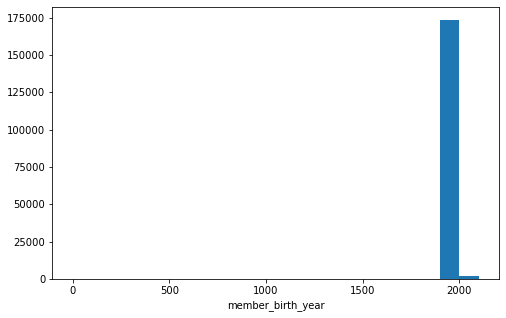

In [39]:
# start with a standard-scaled plot of the member_birth_year column
binsize = 100
bins = np.arange(0, df_notNaN_melt['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = grouped_trip_id, x = 'member_birth_year', bins = bins)
plt.xlabel('member_birth_year')
plt.show()

From the plot above, we can see that most users were born between 1900 and 2000

Next up, let's look at the distribution of the second variable of interest: trip_duration(s)
> **How are trip duration distributed?**

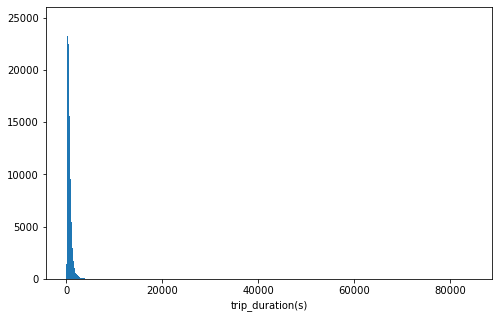

In [40]:
# start with a standard-scaled plot trip_duration
binsize = 100
bins = np.arange(0, grouped_trip_id['trip_duration(s)'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = grouped_trip_id, x = 'trip_duration(s)', bins = bins)
plt.xlabel('trip_duration(s)')
plt.show()

There seems to be a long tail in the distribution, so let's put it on a log scale instead

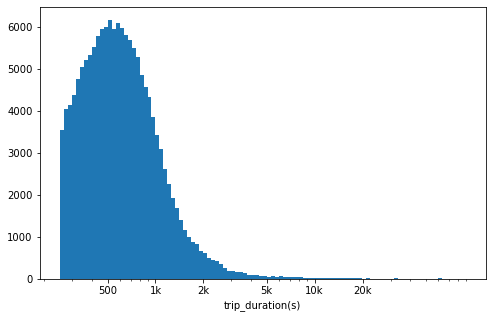

In [41]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(grouped_trip_id['trip_duration(s)'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = grouped_trip_id, x = 'trip_duration(s)', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('trip_duration(s)')
plt.show()

> trip_duration(s) has a long-tailed distribution when plotted on a log-scale, the distribution looks skewed to the right, peaking between 500 and 1000


> Next up, let's plot the categorical columns together to get an idea of each ordinal variable's distribution.

**How are ordinal variables(user_type, agegroup, member_gender) distributed?**

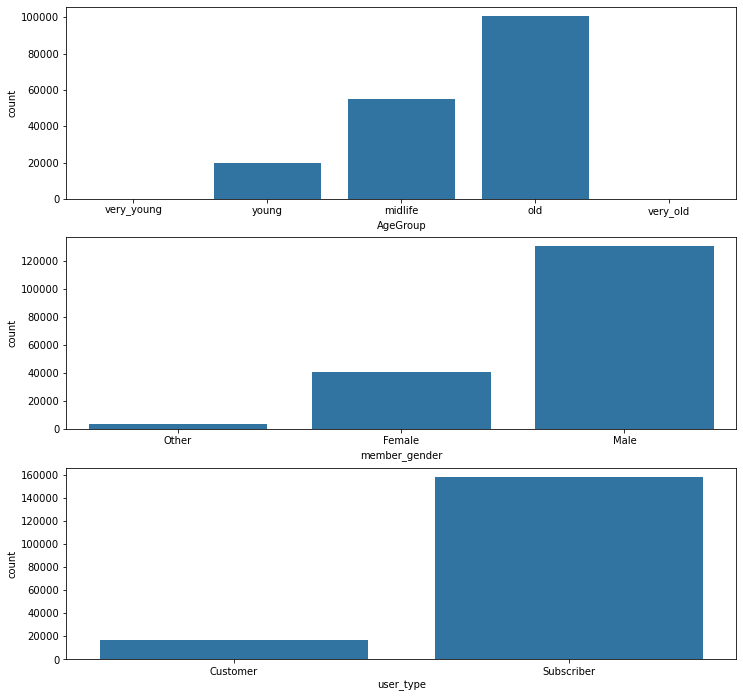

In [42]:
fig, ax = plt.subplots(nrows=3, figsize = [12,12])

default_color = sb.color_palette()[0]
sb.countplot(data = grouped_trip_id, x = 'AgeGroup', color = default_color, ax = ax[0])
sb.countplot(data = grouped_trip_id, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = grouped_trip_id, x = 'user_type', color = default_color, ax = ax[2])

plt.show()

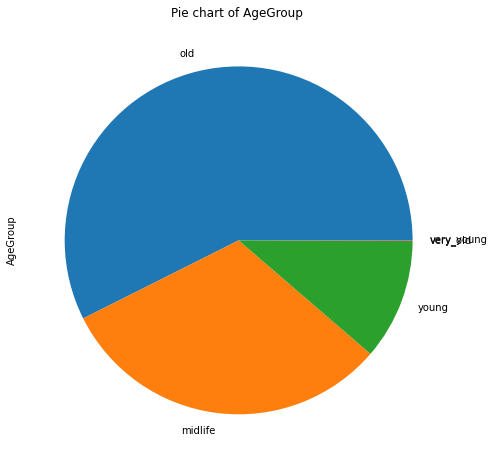

In [43]:
grouped_trip_id['AgeGroup'].value_counts().plot(kind='pie', title='Pie chart of AgeGroup ', figsize= (8,8));

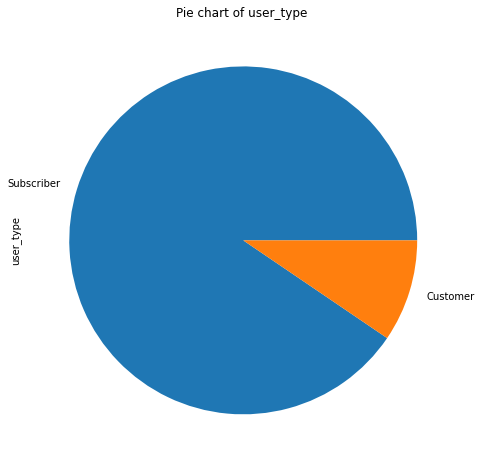

In [44]:
grouped_trip_id['user_type'].value_counts().plot(kind='pie', title='Pie chart of user_type ', figsize= (8,8));

> majority of the users of the rideshare are in the midlife and old ages. there is a moderate amount of users who are young with very little amount of them very young and very old. As for their genders, most of the users are male with less than half of them females and very little amount of them with undisclosed genders. A significantly major part of the users are subscribers with very little amount of them falling into the customer category.


> I'll now look at the other features in the data to see if any of them hold interesting properties.

**How are member bith years and trip duration distributed?**

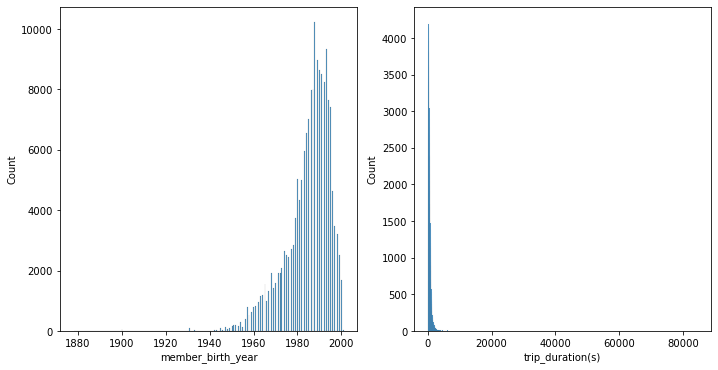

In [45]:
#The code below utilizes a loop to create individual histograms for all numeric variables.
cols = 3
rows = 3
num_cols = grouped_trip_id.select_dtypes(exclude=['category', 'object']).columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sb.histplot(x = grouped_trip_id[col], ax = ax)
    
fig.tight_layout()  
plt.show()

> From the plots above, we can see that trip_duration plot is skewed to the right, member_birth_year is skewed to the left

> Next up, let's look at the distribution of **dates** of trip

**How are number of trips distributed among dates of trip?**

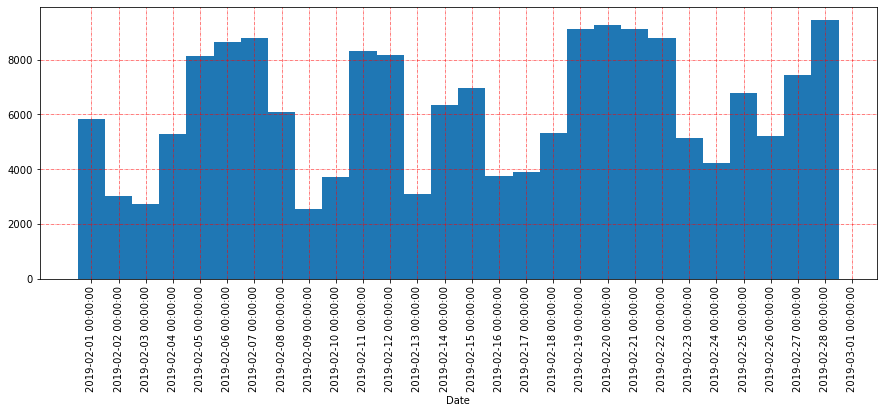

In [46]:
# start with a standard-scaled plot of the member_birth_year column
from datetime import datetime, timedelta
binsize = 1
#bins = np.arange(0, time_trip_df['date'].max()+binsize, binsize)
bins = np.arange(datetime(2019,2,1), datetime(2019,3,2), timedelta(days=binsize)).astype(datetime)

plt.figure(figsize=[15, 5])
plt.hist(data = time_trip_df, x = 'date', bins=bins, align='left')
plt.xlabel('Date')
plt.xticks(bins, bins, rotation = 90)
plt.grid(b = True, color ='red',
        linestyle ='-.', linewidth = 0.5,
        alpha = 1)
plt.show()

From the plot above, we can see that there were more than 8000 trips for the following days: 05-07 February 2019, 11-12 February 2019, 19-22 February 2019, 2019-02-28
> Next up, let's look at the distribution of days of week

**How are number of trips distributed among days of week?**

Let's create new dataframe which contain number of trips for each day of week

In [47]:
dayTrip = time_trip_df.date.dt.day_name().value_counts()

In [48]:
indexL = dayTrip.index
valuesL = dayTrip.values
frame = { 'weekDay': indexL, 'countTrip': valuesL }
dayTrip_df = pd.DataFrame(frame)

In [49]:
dayTrip_df.head()

weekDay  countTrip
0   Thursday      33733
1    Tuesday      30616
2  Wednesday      28456
3     Friday      27682
4     Monday      25686

In [50]:
weekDays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_day = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = weekDays)
dayTrip_df['weekDay'] = dayTrip_df['weekDay'].astype(ordered_day)
dayTrip_df.sort_values("weekDay", axis = 0, ascending = True,
                 inplace = True)

Next up, let's plot the distribution of number of trips per day of week

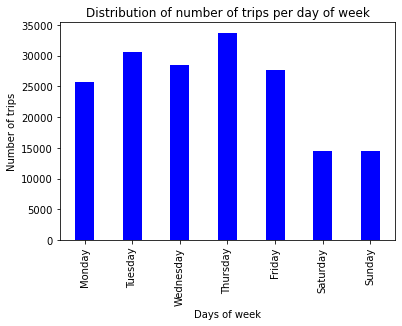

In [87]:
plt.bar(dayTrip_df['weekDay'], dayTrip_df['countTrip'], color ='blue',
        width = 0.4)
plt.xticks(rotation=90)
plt.xlabel("Days of week")
plt.ylabel("Number of trips")
plt.title("Distribution of number of trips per day of week");

From the plot above, we can see that there are more trips on **Tuesday** and **Thursday**

> Next up, let's identify period of day where we can see more trips

**How are number of trips distributed among hours of day?**

In [52]:
time_trip_df[['hour','minute', 'second']] = time_trip_df.time.str.split(pat=':', expand=True)
time_trip_df.head()

time   user_type AgeGroup       date hour minute  second
0  17:32:10.145    Customer  midlife 2019-02-28   17     32  10.145
1  12:13:13.218    Customer  midlife 2019-02-28   12     13  13.218
2  17:54:26.010  Subscriber      old 2019-02-28   17     54  26.010
3  23:54:18.549  Subscriber  midlife 2019-02-28   23     54  18.549
4  23:49:58.632  Subscriber    young 2019-02-28   23     49  58.632

In [53]:
time_trip_df.drop(columns=['time'], inplace=True)
time_trip_df.head()

user_type AgeGroup       date hour minute  second
0    Customer  midlife 2019-02-28   17     32  10.145
1    Customer  midlife 2019-02-28   12     13  13.218
2  Subscriber      old 2019-02-28   17     54  26.010
3  Subscriber  midlife 2019-02-28   23     54  18.549
4  Subscriber    young 2019-02-28   23     49  58.632

In [54]:
time_trip_df['hour'] = time_trip_df['hour'].astype(int)
time_trip_df['minute'] = time_trip_df['minute'].astype(int)
time_trip_df['second'] = time_trip_df['second'].astype(float)
time_trip_df.dtypes

user_type            object
AgeGroup           category
date         datetime64[ns]
hour                  int64
minute                int64
second              float64
dtype: object

In [55]:
time_trip_df.sort_values("hour", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
time_trip_df['hour'].value_counts()

17    20921
8     20242
18    16133
9     15221
16    13492
7     10235
19     9432
15     8657
12     8237
13     8118
10     7980
14     7694
11     7473
20     6220
21     4401
6      3294
22     2793
23     1573
0       893
5       866
1       525
2       356
4       227
3       164
Name: hour, dtype: int64

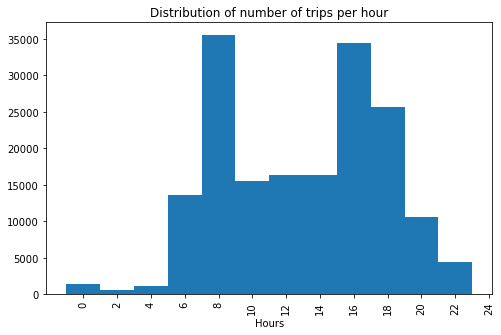

In [56]:
binsize = 2
bins = np.arange(0, time_trip_df['hour'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = time_trip_df, x = 'hour', bins = bins, align='left')
plt.xticks(bins, bins, rotation = 90)
plt.xlabel('Hours')
plt.title("Distribution of number of trips per hour")
plt.show()

From the plot above, we can see that there are more trips on periods: from **07:00 am to 09:00 am** and from **03:00 pm to 05:00 pm**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As stated earlier, from the different plots we can see that majority of the users of the rideshare are in the midlife and old ages. there is a moderate amount of users who are young with very little amount of them very young and very old. As for their genders, most of the users are male with less than half of them females and very little amount of them with undisclosed genders. A significantly major part of the users are subscribers with very little amount of them falling into the customer category. trips are made more on Tuesdays and Thursdays, and in following periods: from **07:00 am to 09:00 am** and from **03:00 pm to 05:00 pm**; There didn't seem to be any unusual points, therefore there was no need for any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was nothing unusual in the distributions and so there was no need to perform any adjustments of the data.

## Bivariate Exploration



> It would be better to use label encoding to get a better understanding of the correlation between AgeGroup and trip_duration. so that we know how the age group of the users influenced how long they used the bikes.

In [57]:
bike_trip_df = grouped_trip_id.copy()

In [58]:
#Label Encoding

featured = [ 'AgeGroup' ]
def encod_age_group(df):
    for feature in featured:
        df[f"{feature}_cat"] = df[feature].astype('category')
        df[f"{feature}_cat"] = df[f"{feature}_cat"].cat.codes

In [59]:
encod_age_group(bike_trip_df)
bike_trip_df.head()

member_birth_year member_gender   user_type AgeGroup  \
0               1984          Male    Customer  midlife   
1               1972          Male    Customer  midlife   
2               1993          Male  Subscriber      old   
3               1998          Male  Subscriber      old   
4               1977          Male  Subscriber  midlife   

  bike_share_for_all_trip  trip_duration(s)  AgeGroup_cat  
0                      No         52185.830             2  
1                      No         61854.928             2  
2                      No           506.193             3  
3                      No           259.032             3  
4                      No           386.978             2

In [60]:
numeric_vars = ['trip_duration(s)', 'AgeGroup_cat']
categoric_vars = ['user_type', 'member_gender', 'AgeGroup']

****How are number of trips distributed among dates of trip?****

In [61]:
# correlation plot
def heatmap(df,feature):
    plt.figure(figsize = [8, 5])
    sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
    plt.title('correlation plot for {} and AgeGroup_cat'.format(feature))
    plt.show()

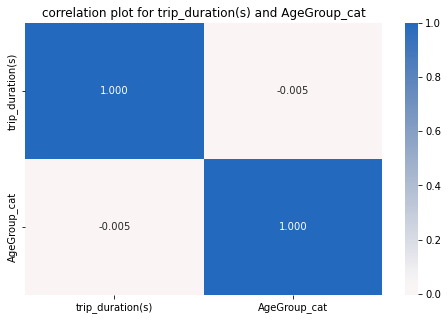

In [62]:
heatmap(bike_trip_df, 'trip_duration(s)');

From the plot above, we can see there is direct correlation between trip duration and agegroup cat
> Next up, let's matrix of sample of 5000 bike shares

In [63]:
def pairgrid(df):
    g = sb.PairGrid(data = df, vars = numeric_vars)
    g = g.map_diag(plt.hist, bins = 10);
    g.map_offdiag(plt.scatter);

bike_trip_df.shape= (175147, 7)
bikeshare_samp.shape= (18000, 7)


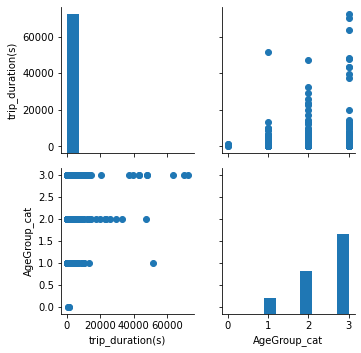

In [64]:
print("bike_trip_df.shape=",bike_trip_df.shape)
bikeshare_samp = bike_trip_df.sample(n=18000, replace = False)
print("bikeshare_samp.shape=",bikeshare_samp.shape)

pairgrid(bikeshare_samp);

> Next up, let's distribution of agegroup and time spent on rideshare

**How are age groups distributed among time spent?**

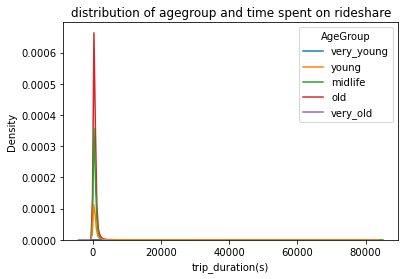

In [65]:
sb.kdeplot(x='trip_duration(s)', data=bike_trip_df, hue='AgeGroup')
plt.title('distribution of agegroup and time spent on rideshare');

Users who spend more time in trips are in old and midlife groups

**How are gender of users distributed among time spent?**

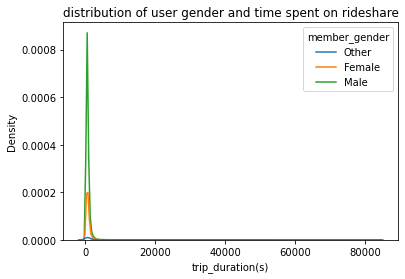

In [66]:
sb.kdeplot(x='trip_duration(s)', data=bike_trip_df, hue='member_gender')
plt.title('distribution of user gender and time spent on rideshare');

Users who spend more time in trips are male

**How are number of trips distributed among trip duration?**

<AxesSubplot:xlabel='trip_duration(s)', ylabel='Count'>

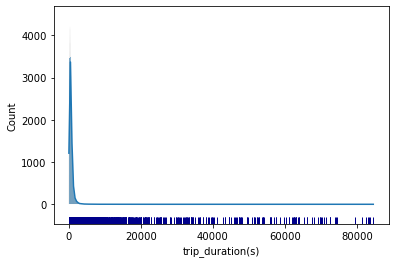

In [67]:
sb.rugplot(x='trip_duration(s)', data=bike_trip_df, height=.03, color='darkblue')
sb.histplot(x='trip_duration(s)', data=bike_trip_df, kde=True)

majority of trips have a duration of less than 2000 seconds

> Next up, let's plot matrix of numeric features against categorical features.

**How are numeric features distributed against categorical features?**

<Figure size 720x720 with 0 Axes>

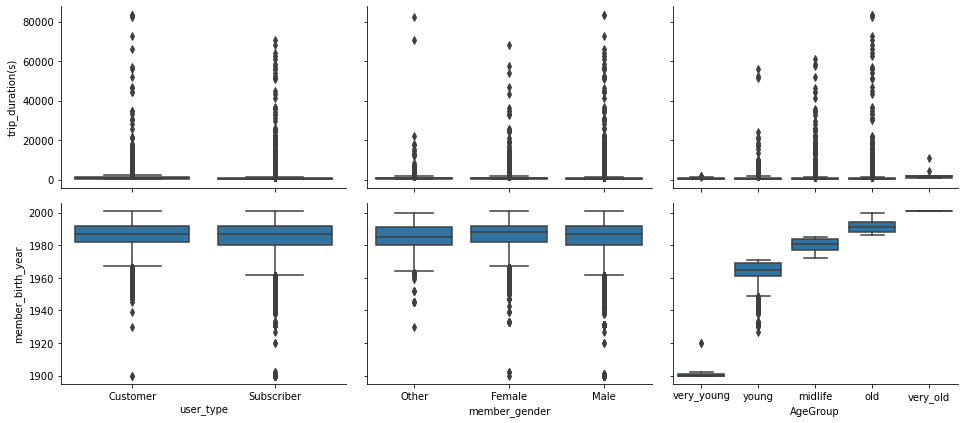

In [68]:
# can use a larger sample since there are fewer plots and they're simpler in nature.

bikeshare_samp = bike_trip_df.sample(n=64000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bikeshare_samp, y_vars = ['trip_duration(s)', 'member_birth_year'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

> Next up, let's plot age distribution among gender of users, and user type distribution among agegroup

**How are age groups distributed among gender of users, user type among age groups?**

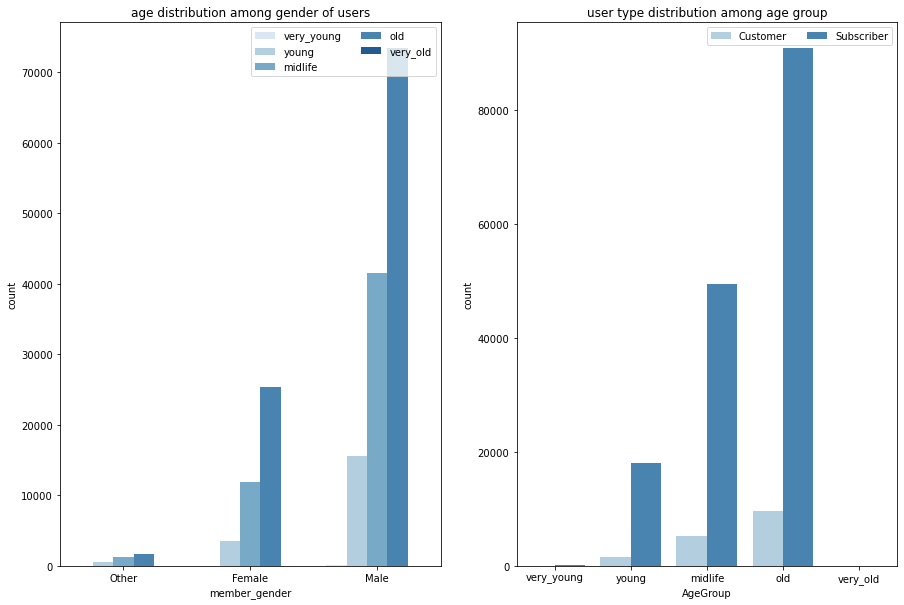

In [69]:
# since there's only one subplot to create, using the full data should be fine.
plt.figure(figsize = [15, 10])

# subplot 1: member_gender vs AgeGroup
ax1 = plt.subplot(1, 2, 1)
sb.countplot(data = bike_trip_df, x = 'member_gender', hue = 'AgeGroup', palette = 'Blues')
ax1.legend(ncol = 2)
ax1.title.set_text('age distribution among gender of users')

# subplot 2: AgeGroup vs user_type
ax2 = plt.subplot(1, 2, 2)
sb.countplot(data = bike_trip_df, x = 'AgeGroup', hue = 'user_type', palette = 'Blues')
ax2.legend(ncol = 2)
ax2.title.set_text('user type distribution among age group')

#plt.title('age distribution among gender of users')
plt.show()

From the plot above, we can see that midlife and old age groups are predominant in the male and female genders; And most users in all group of age except very young and very old groups are subscribers; there are almost no users in the very_young and very_old age groups
> Next up, let's plot distribution of number of trips

In [70]:
encod_age_group(time_trip_df)

In [71]:
time_trip_df.head()

user_type AgeGroup       date  hour  minute  second  AgeGroup_cat
175146  Subscriber      old 2019-02-01     0       0  20.636             3
83710   Subscriber      old 2019-02-17     0      40  35.986             3
83711   Subscriber  midlife 2019-02-17     0      30   3.687             2
83712   Subscriber  midlife 2019-02-17     0      30  45.421             2
83713   Subscriber      old 2019-02-17     0      28  27.173             3

Now, let's create a new dataframe which contain number of trips, agegroup_cat

In [72]:
def compute_nb_trips(feature):
    number_trips = time_trip_df[f"{feature}"].value_counts()
    indexL = number_trips.index
    valuesL = number_trips.values
    frame = { f"{feature}": indexL, 'countTrip': valuesL }
    number_trips_df = pd.DataFrame(frame)
    return number_trips_df
    

In [73]:
number_trips_df = compute_nb_trips('AgeGroup_cat')
number_trips_df.head()

AgeGroup_cat  countTrip
0             3     100548
1             2      54781
2             1      19709
3             0         75
4             4         34

**What is correlation between number of trips and age group?**

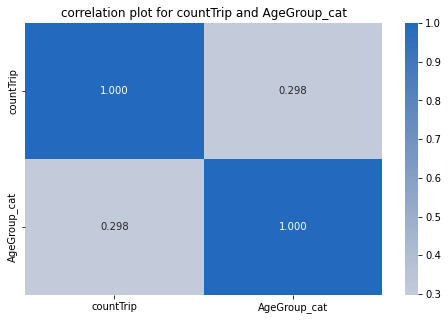

In [74]:
numeric_vars = ['countTrip', 'AgeGroup_cat']
heatmap(number_trips_df, 'countTrip')

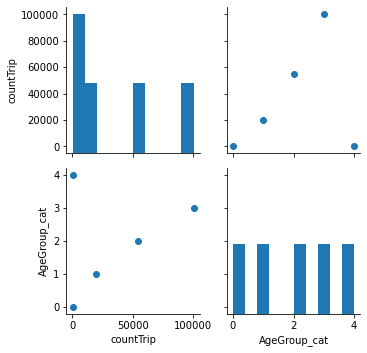

In [75]:
pairgrid(number_trips_df)

From the plot above, we can see that users in midlife and old age groups make more trips
> Next up, let's plot distribution of user type against number of trips on rideshare

In [76]:
number_trips_df = compute_nb_trips('user_type')
number_trips_df.head()

user_type  countTrip
0  Subscriber     158516
1    Customer      16631

In [77]:
number_trips_df['countTrip_proportion'] = (number_trips_df['countTrip']/(number_trips_df['countTrip'].sum())) *100

In [78]:
number_trips_df.head()

user_type  countTrip  countTrip_proportion
0  Subscriber     158516             90.504548
1    Customer      16631              9.495452

**How are number of trips distributed among user type?**

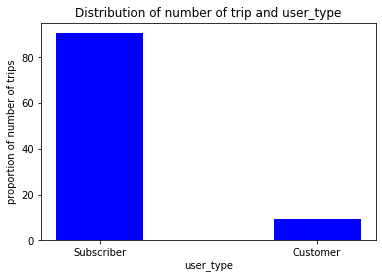

In [79]:
plt.bar(number_trips_df['user_type'], number_trips_df['countTrip_proportion'], color ='blue',
        width = 0.4);
plt.xlabel("user_type")
plt.ylabel("proportion of number of trips")
plt.title("Distribution of number of trip and user_type");

From the plot above, we can see that users who make more trips are subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From all the plots, I discovered that there is a direct corelation between agegroup_cat which is the encoded version of the agegroup, the agegroup itself and the trip_duration(s). We can also see there some outliers in the very young group of the agegroup variable, but they are of no consequence and so were not removed. This supports the discovery from the previous section that users in the midlife and the old group of the age group spent more time and make more trips user the ride share than any of the other age groups.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There were some insignificant outliers that were left alone.

## Multivariate Exploration



> here I continued exploring the relationship between trip_duration and the other features.

**How are trip durations distributed among age groups?**

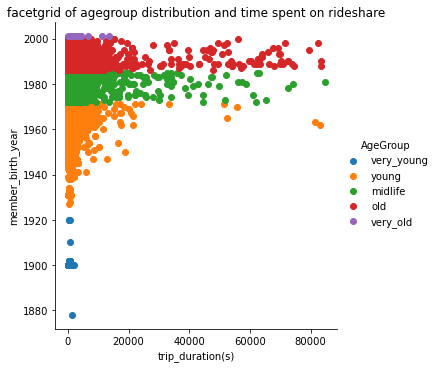

In [80]:
g = sb.FacetGrid(data = bike_trip_df, hue = 'AgeGroup', height = 5)
g.map(plt.scatter, 'trip_duration(s)', 'member_birth_year')
g.add_legend()
plt.title('facetgrid of agegroup distribution and time spent on rideshare');

Users in old and midlife age groups spend more time in trips than others age groups

**How are trip durations distributed among age groups and gender of users?**

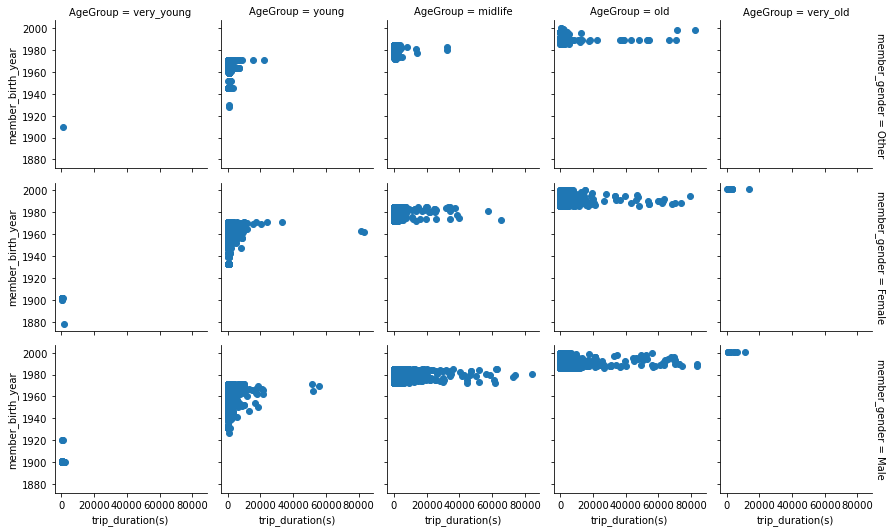

In [81]:
g = sb.FacetGrid(data = bike_trip_df, col = 'AgeGroup', row = 'member_gender', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'trip_duration(s)', 'member_birth_year');

From the plot above, we can confirm that users who spend more time in trips are in old and midlife age groups
> Next up, let's explore relationship between number of trips, user type and age group

**How are number of trips distributed among age groups and user types?**

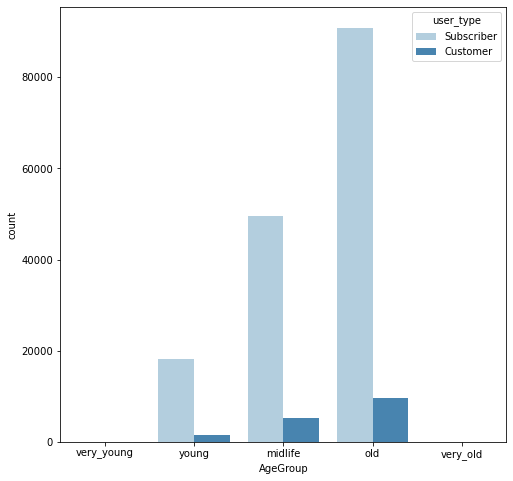

In [82]:
plt.figure(figsize = [8, 8])
sb.countplot(data = time_trip_df, x = 'AgeGroup', hue = 'user_type', palette = 'Blues')
plt.show()

From the plot above, we can see that users who make more trips are in old and midlife age groups no matter what type of user
> Next up, let's explore relationship between number of trips, days of week, age group, and user type

**How are number of trips distributed against days of week, age groups, and user types**

In [83]:
time_trip_df['day_of_week'] = time_trip_df.date.dt.day_name()
def facetGrid(feature, *argv):
    g = sb.FacetGrid(data = time_trip_df, col = 'AgeGroup', row = 'user_type', height = 2.5,
                margin_titles = True)
    if (len(argv) != 0):
        #print(len(argv))
        binwidth=argv[0]
        binmax=argv[1]
        g.map_dataframe(sb.histplot, x=f"{feature}", binwidth=binwidth, binrange=(0, binmax))
        g.set(xticks=argv[2])
        g.set_xticklabels(argv[2], rotation=90)
    else:
        g.map_dataframe(sb.histplot, x=f"{feature}")
        g.set_xticklabels(rotation=90)
    g.set_ylabels('Number of trips');

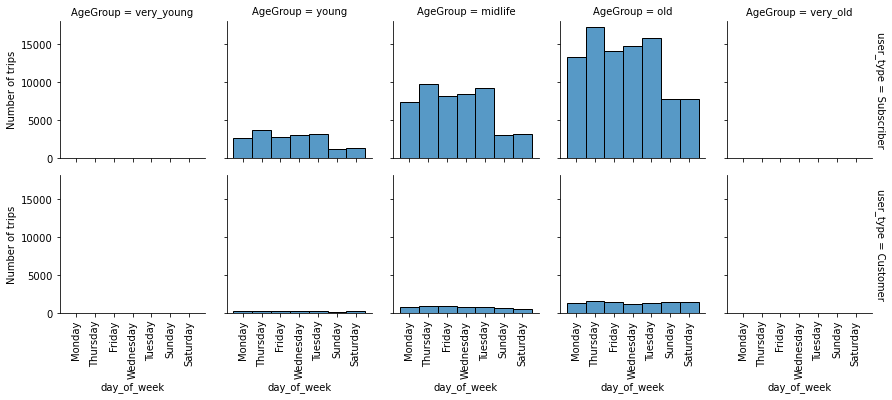

In [84]:
facetGrid('day_of_week');

From the plot above, we can see that:
* Users who make more trips are in old and midlife age groups no matter what type of user
* Users in old and midlife age groups make more trips on Thurdays and Tuesdays
> Next up, let's explore relationship between number of trips, hours of day, age group, and user type

**How are number of trips distributed against hours of day, age groups, and user types**

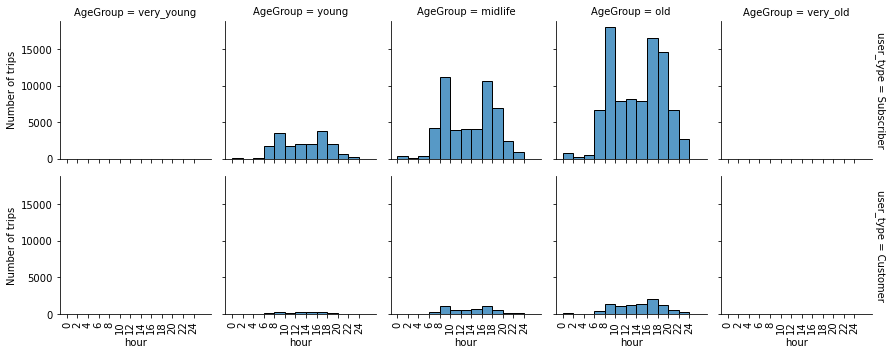

In [85]:
binsize = 2
bins = np.arange(0, time_trip_df['hour'].max()+binsize, binsize)
facetGrid('hour', binsize, time_trip_df['hour'].max()+binsize, bins);

From the plot above, we can see that:
* Users who make more trips are in old and midlife age groups no matter what type of user
* Users make more trips between 08:00 am and 10:00 am, 04:00 pm and 06:00 pm no matter what type of user and age group of user

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of trip_duration(s) in this section by looking at the relationship between trip_duration(s), member_gender, agegroup and member_birth_year features. The multivariate exploration here showed that there indeed is a correlation between the trip_duration(s) and agegroup, number of trips and agegroup as observed in the previous section.

### Were there any interesting or surprising interactions between features?

> there is no surprise interaction between features

In [86]:
#save cleaned dataset
bike_trip_df.to_csv('cleaned_bike_trip_df.csv', index=False)
time_trip_df.to_csv('cleaned_time_trip_df.csv', index=False)

## Conclusions



In conclusion, we can say that there is a positive correlation between the duration of the trip and the age category, and then between the number of trips made and the age category; i.e. as the age category of the users increases, the number of trips and the duration of the trip also increases. The age categories very_young and very_old are insignificant, so the data related to these categories can be deleted.